<a href="https://colab.research.google.com/github/IshanSarkar/Topics-Practice/blob/main/GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the Data

In [13]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 79.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 22.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 27.1MB/s]


In [14]:
import pickle
# Load data (deserialize)
import pandas as pd
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    # X_train = pickle.load(handle)
    X_train = pd.read_pickle("preprocessed_X_sm.pickle")

with open('X_test.pickle', 'rb') as handle:
    # X_test = pickle.load(handle)
    X_test = pd.read_pickle("X_test.pickle")


with open('y_sm.pickle', 'rb') as handle:
    # y_train = pickle.load(handle)
    y_train = pd.read_pickle("y_sm.pickle")


with open('y_test.pickle', 'rb') as handle:
    # y_test = pickle.load(handle)
    y_test = pd.read_pickle("y_test.pickle")


In [15]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
y_train.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


### Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss="log_loss")

gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [18]:
gbc.score(X_train, y_train)

0.948051948051948

In [19]:
gbc.score(X_test, y_test)

0.8804347826086957

In [20]:
import matplotlib.pyplot as plt

In [21]:
n_estimators_range = range(100, 300, 40)
max_depth_range = range(1, 10, 1)

In [22]:
train_scores = []
test_scores = []

In [23]:
import numpy as np
for max_depth in max_depth_range:
    for n_estimators in n_estimators_range:
        gbc = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, loss="log_loss")
        gbc.fit(X_train, y_train)
        train_scores.append((n_estimators, max_depth, gbc.score(X_train, y_train)))
        test_scores.append((n_estimators, max_depth, gbc.score(X_test, y_test)))

In [24]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

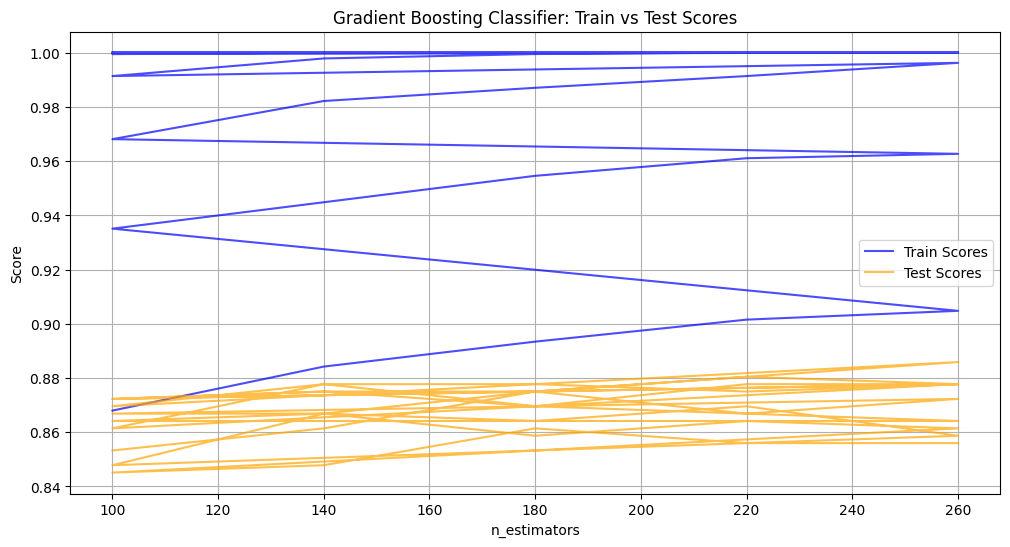

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(
    train_scores[:, 0],
    train_scores[:, 2],
    label="Train Scores", color='blue', alpha=0.7
)
plt.plot(
    test_scores[:, 0],
    test_scores[:, 2],
    label="Test Scores", color='orange', alpha=0.7
)
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("Gradient Boosting Classifier: Train vs Test Scores")
plt.legend()
plt.grid()
plt.show()

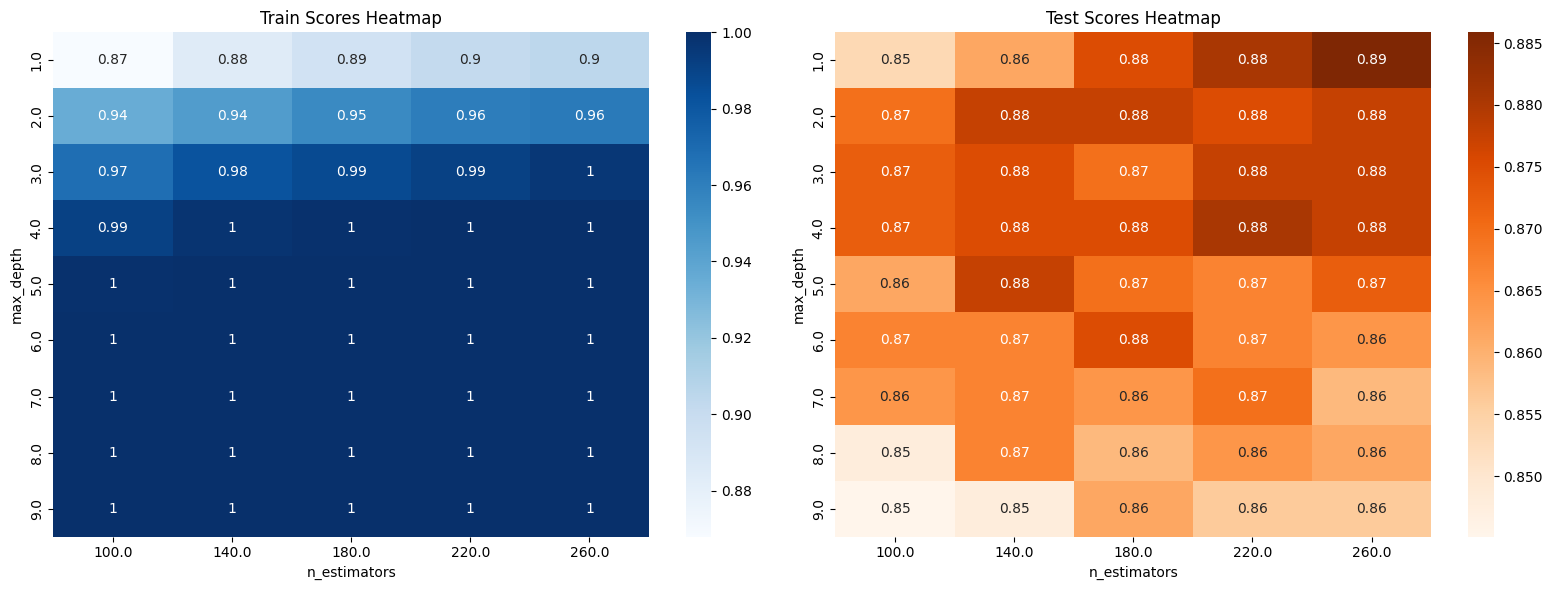

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for train and test scores
train_scores_df = pd.DataFrame(train_scores, columns=["n_estimators", "max_depth", "score"]).pivot(
    index="max_depth", columns="n_estimators", values="score"
)

test_scores_df = pd.DataFrame(test_scores, columns=["n_estimators", "max_depth", "score"]).pivot(
    index="max_depth", columns="n_estimators", values="score"
)

# Plot heatmaps
plt.figure(figsize=(16, 6))

# Train scores heatmap
plt.subplot(1, 2, 1)
sns.heatmap(train_scores_df, annot=True, cmap="Blues", cbar=True)
plt.title("Train Scores Heatmap")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

# Test scores heatmap
plt.subplot(1, 2, 2)
sns.heatmap(test_scores_df, annot=True, cmap="Oranges", cbar=True)
plt.title("Test Scores Heatmap")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

plt.tight_layout()
plt.show()

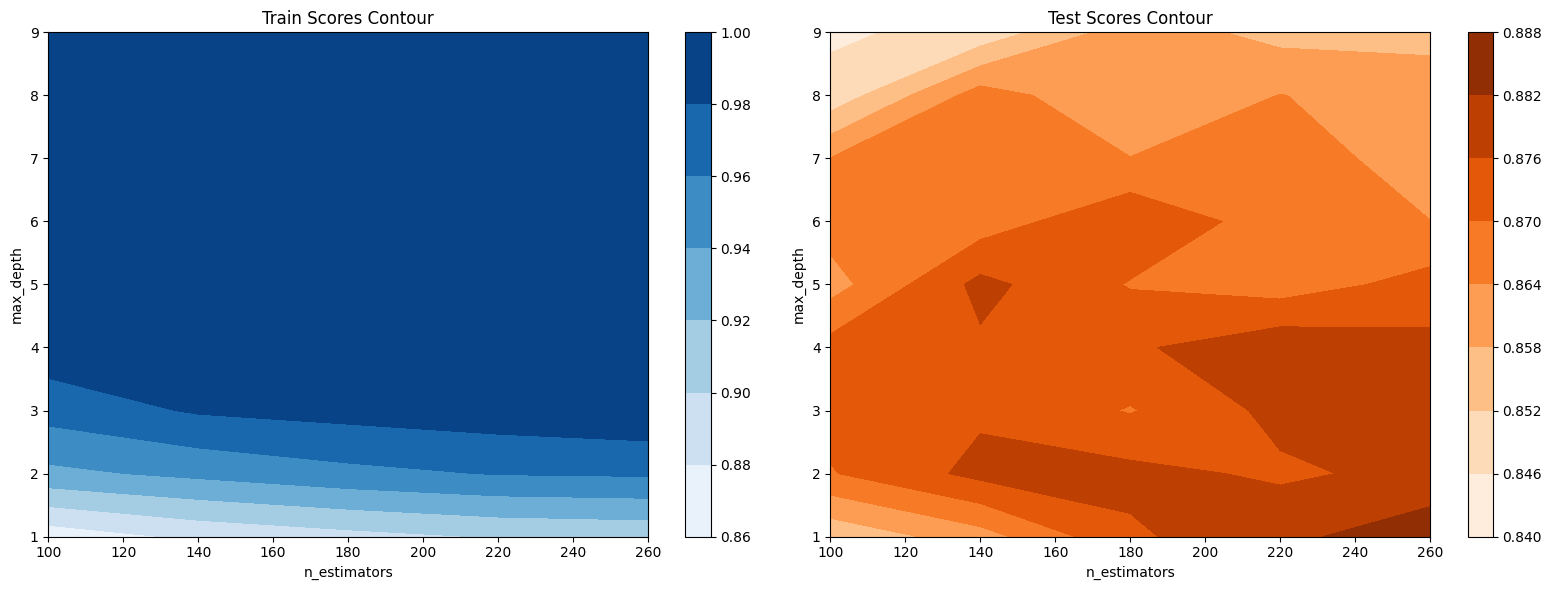

In [35]:
plt.figure(figsize=(16, 6))

# Train scores contour
plt.subplot(1, 2, 1)
plt.contourf(train_scores_df.columns, train_scores_df.index, train_scores_df, cmap="Blues")
plt.colorbar()
plt.title("Train Scores Contour")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

# Test scores contour
plt.subplot(1, 2, 2)
plt.contourf(test_scores_df.columns, test_scores_df.index, test_scores_df, cmap="Oranges")
plt.colorbar()
plt.title("Test Scores Contour")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")

plt.tight_layout()
plt.show()

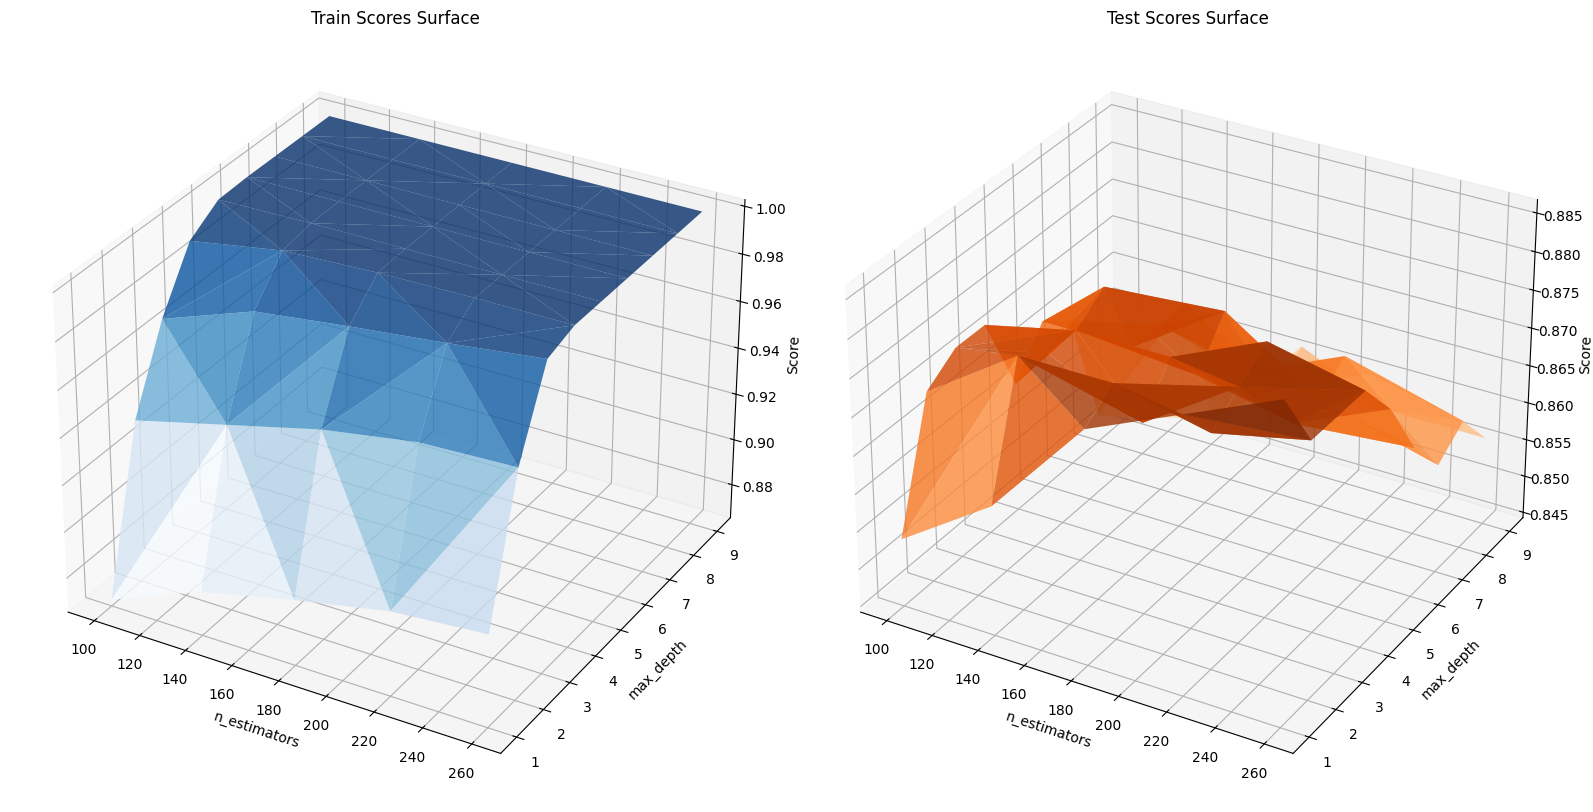

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(16, 8))

# Train scores surface
ax = fig.add_subplot(121, projection="3d")
ax.plot_trisurf(
    train_scores[:, 0], train_scores[:, 1], train_scores[:, 2], cmap="Blues", alpha=0.8
)
ax.set_title("Train Scores Surface")
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Score")

# Test scores surface
ax = fig.add_subplot(122, projection="3d")
ax.plot_trisurf(
    test_scores[:, 0], test_scores[:, 1], test_scores[:, 2], cmap="Oranges", alpha=0.8
)
ax.set_title("Test Scores Surface")
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_zlabel("Score")

plt.tight_layout()
plt.show()

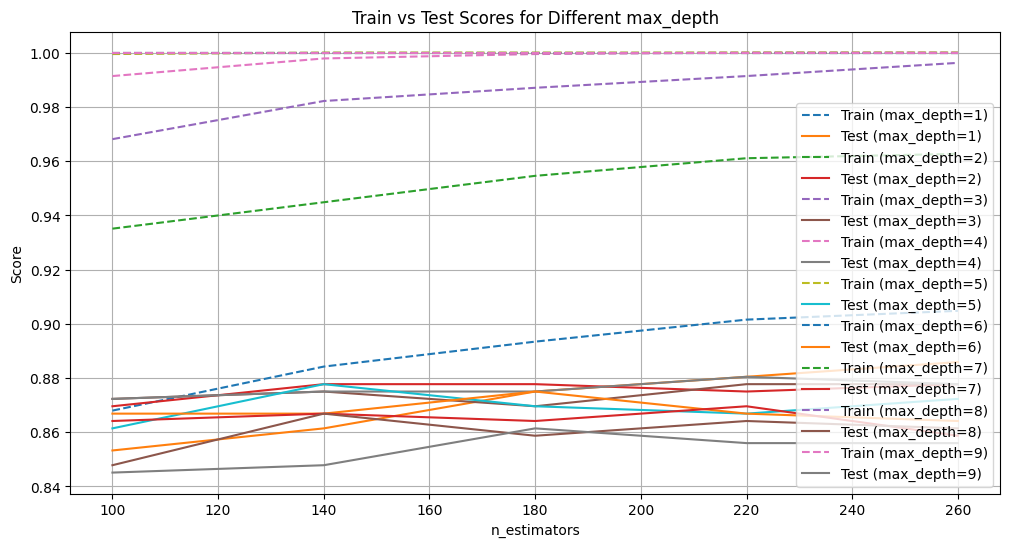

In [37]:
plt.figure(figsize=(12, 6))

for max_depth in max_depth_range:
    train_subset = [score for n, d, score in train_scores if d == max_depth]
    test_subset = [score for n, d, score in test_scores if d == max_depth]

    plt.plot(
        n_estimators_range, train_subset, label=f"Train (max_depth={max_depth})", linestyle="--"
    )
    plt.plot(
        n_estimators_range, test_subset, label=f"Test (max_depth={max_depth})", linestyle="-"
    )

plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("Train vs Test Scores for Different max_depth")
plt.legend()
plt.grid()
plt.show()

In [38]:
import plotly.graph_objects as go
import numpy as np

# Prepare data for the surface plot
X = train_scores_df.columns.astype(int)
Y = train_scores_df.index.astype(int)
Z_train = train_scores_df.values
Z_test = test_scores_df.values

# Create a 3D surface plot for train scores
fig = go.Figure()

fig.add_trace(go.Surface(z=Z_train, x=X, y=Y, colorscale="Blues", name="Train Scores"))
fig.add_trace(go.Surface(z=Z_test, x=X, y=Y, colorscale="Oranges", name="Test Scores"))

# Update layout for better visualization
fig.update_layout(
    title="Interactive 3D Surface Plot of Train and Test Scores",
    scene=dict(
        xaxis_title="n_estimators",
        yaxis_title="max_depth",
        zaxis_title="Score",
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the plot
fig.show()